In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib  import cm

#from matplotlib.colors import TwoSlopeNorm
NoBinsDist = 10
NoBinsThet = 15
datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteDumbbells/Data_and_Figures/Fig_Pathways/Data/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteDumbbells/Data_and_Figures/Fig_Pathways/Plots/'

In [2]:
dist_start = 75
dist_end = -100
thet_start = 90
thet_startv = 90
thet_end = 0
thet_endv = 0
dist_int = (dist_start-dist_end)/NoBinsDist
thet_int = (thet_start-thet_end)/NoBinsThet
thet_intv = (thet_startv-thet_endv)/NoBinsThet
eps = 5
size = 7.5
init = 0.0
rad9722 = 25.331
ih =14
iv = 29
NoBinsDist = 10
NoBinsThet = 15
distances = np.arange(dist_start,dist_end,-dist_int)
thetas = np.arange(thet_start,thet_end,-thet_int)
d1 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re.dat", header = None, sep=' ')[2]
te1 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re.dat", header = None, sep=' ')[1]
d2 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re2.dat", header = None, sep=' ')[2]
te2 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re2.dat", header = None, sep=' ')[1]
dv = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(iv)+"_"+str(eps)+"_"+str(size)+".dat", header = None, sep=' ')[2]
tev = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(iv)+"_"+str(eps)+"_"+str(size)+".dat", header = None, sep=' ')[1]
d = np.append(d1,d2)
te = np.append(te1,te2)
distance = []
theta = []
distancev = []
thetav = []
bins = np.zeros((NoBinsDist, NoBinsThet+1))
binsv = np.zeros((NoBinsDist, NoBinsThet+1))
for j in range(len(d)):
    if d[j]< 35.1 and d[j]> 15: #dumbbell either inside of outside membrane, not attached
        distance.append(10*(d[j]-rad9722))
        theta.append(180-te[j]*180/np.pi)
for j in range(len(dv)):
    if dv[j]< 35.1 and dv[j]> 15: #dumbbell either inside of outside membrane, not attached
        distancev.append(10*(dv[j]-rad9722))
        thetav.append(180-tev[j]*180/np.pi)
dist = np.zeros(((NoBinsDist+1)*NoBinsThet))
thet = np.zeros(((NoBinsDist+1)*NoBinsThet))
bins2 = np.zeros(((NoBinsDist+1)*NoBinsThet))
distv = np.zeros(((NoBinsDist+1)*NoBinsThet))
thetv = np.zeros(((NoBinsDist+1)*NoBinsThet))
bins2v = np.zeros(((NoBinsDist+1)*NoBinsThet))
l=0
for j in range(NoBinsDist):
    for k in range(NoBinsThet):
        count = 0 
        
        for i in range(len(distance)):
            if distance[i] < (dist_start-j*dist_int) and distance[i]>=(dist_start-(j+1)*dist_int):
                if theta[i] < (thet_start-k*thet_int) and theta[i]>=(thet_start-(k+1)*thet_int):
                    
                    if bins[j,k] == 0:
                        dist[l] = distance[i]
                        thet[l] = theta[i]
                    count = 1
                    bins[j,k] +=1
                    bins2[l] += 1 
        l += 1

l=0
for j in range(NoBinsDist):
    for k in range(NoBinsThet):
        count = 0 
        for i in range(len(distancev)):
            if distancev[i] < (dist_start-j*dist_int) and distancev[i]>=(dist_start-(j+1)*dist_int):
                if thetav[i] < (thet_startv-k*thet_intv) and thetav[i]>=(thet_startv-(k+1)*thet_intv):
                    
                    if binsv[j,k] == 1:
                        distv[l] = distancev[i]
                        thetv[l] = thetav[i]
                    count = 1
                    binsv[j,k] +=1
                    bins2v[l] += 1 
        l += 1
        
z = np.arange(len(distance))
z = len(distances)*len(thetas)
last_int = len(theta)
distances = np.arange(dist_start,dist_end,-dist_int)
thetas = np.arange(thet_start,thet_end,-thet_int)
print('time_vert', len(distancev))
print('time_horz', len(distance))

time_vert 2455
time_horz 1615


0.0 0.0


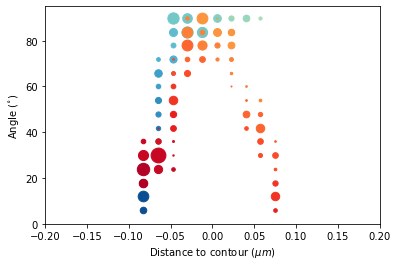

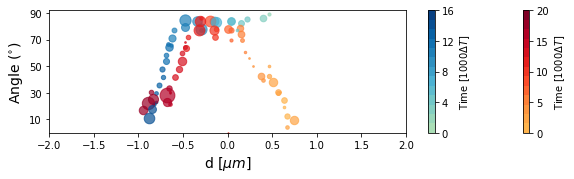

In [9]:
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots(figsize = (10,2.5))
cmap2 = mpl.cm.YlOrRd(np.linspace(0,1,20))
cmap2 = mpl.colors.ListedColormap(cmap2[7:,:-1])
cmap1 = mpl.cm.GnBu(np.linspace(0,1,20))
cmap1 = mpl.colors.ListedColormap(cmap1[7:,:-1])

print(thet[(NoBinsDist+1)*NoBinsThet-1],dist[(NoBinsDist+1)*NoBinsThet-1] )
for i in range(len(distances)):
    for j in range(len(thetas)):
        ax2.scatter(distances[i]/1000,thetas[j],s=bins[i,j],color=cmap1((i+j)/(len(thetas)+len(distances))), marker = 'o');
        ax2.scatter(distances[i]/1000,thetas[j],s=binsv[i,j],color=cmap2((i+j)/(len(thetas)+len(distances))), marker = 'o');
for i in range(((NoBinsDist)*NoBinsThet-1)):
    ax3.scatter(dist[i]/100, thet[i],s=bins2[i],color=cmap1((i)/((NoBinsDist+1)*NoBinsThet)), marker = 'o', alpha = 0.7);
    ax3.scatter(distv[i]/100, thetv[i],s=bins2v[i],color=cmap2((i)/((NoBinsDist+1)*NoBinsThet)), marker = 'o', alpha = 0.7);
    #print(distv[i],thet[i], bins2v[i])
#print(dist)


ax2.set_ylabel(r"Angle ($^{\circ}$)")
ax2.set_xlabel(r"Distance to contour ($\mu m$)")#"($ \mu m$)")
ax2.set_xlim(-0.200,0.200)

ax3.set_xticks([-0.200,-0.150,-0.100,-0.050,0,0.050,0.100,0.150,0.200])
ax3.set_xticks([-2.00,-1.50,-1.00,-.50,0,0.50,1.00,1.50,2.00])
ax3.set_xlim(-2.00,2.00)
ax3.set_ylabel(r"Angle ($^{\circ}$)", fontsize = 14)
ax3.set_xlabel(r"d [$\mu m$]", fontsize = 14)#"($ \mu m$)")
#ax3.set_xticklabels(["-2.0","-0.15","-0.1","-0.05","0","0.05","0.1","0.15","0.2"])
ax3.set_yticks([10,30,50,70,90])
ax3.set_yticklabels(["10","30","50","70","90"])
ax2.set_ylim(0,95)
ax3.set_ylim(0,92)
fig3.subplots_adjust(bottom=0.2)
cbar2 = fig3.colorbar(mappable=None, cax=None, ax=None, cmap = cmap2, label = r'Time [$1000\Delta T$]',ticks=[0, 0.25,0.5,0.75, 1])
cbar1 = fig3.colorbar(mappable=None, cax=None, ax=None, cmap = cmap1, label = r'Time [$1000\Delta T$]',ticks=[0, 0.25,0.5,0.75, 1])
cbar1.ax.set_yticklabels(['0', '4', '8', '12','16'])  
cbar2.ax.set_yticklabels(['0', '5','10','15', '20'])  

fname = "LobePathway"
fig3.savefig(plotsdir+fname+".pdf")

In [4]:
ih =1
iv = 21
NoBinsDist = 10
NoBinsThet = 15

dist_start = 75
dist_end = -100
thet_start = 90
thet_startv = 90
thet_end = 0
thet_endv = 0
dist_int = (dist_start-dist_end)/NoBinsDist
thet_int = (thet_start-thet_end)/NoBinsThet
thet_intv = (thet_startv-thet_endv)/NoBinsThet
d1 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re.dat", header = None, sep=' ')[2]
te1 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re.dat", header = None, sep=' ')[1]
d2 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re2.dat", header = None, sep=' ')[2]
te2 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(ih)+"_"+str(eps)+"_"+str(size)+"_re2.dat", header = None, sep=' ')[1]
dv = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(iv)+"_"+str(eps)+"_"+str(size)+".dat", header = None, sep=' ')[2]
tev = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_"+str(init)+"0_2.9_"+str(iv)+"_"+str(eps)+"_"+str(size)+".dat", header = None, sep=' ')[1]
d = np.append(d1,d2)
te = np.append(te1,te2)
distance = []
theta = []
distancev = []
thetav = []
bins = np.zeros((NoBinsDist, NoBinsThet))
binsv = np.zeros((NoBinsDist, NoBinsThet))
for j in range(len(d)):
    if d[j]< 35.1 and d[j]> 15: #dumbbell either inside of outside membrane, not attached
        distance.append(10*(d[j]-rad9722))
        theta.append(180-te[j]*180/np.pi)
for j in range(len(dv)):
    if dv[j]< 35.1 and dv[j]> 15: #dumbbell either inside of outside membrane, not attached
        distancev.append(10*(dv[j]-rad9722))
        thetav.append(180-tev[j]*180/np.pi)
dist = np.zeros(((NoBinsDist+1)*NoBinsThet))
thet = np.zeros(((NoBinsDist+1)*NoBinsThet))
bins2 = np.zeros(((NoBinsDist+1)*NoBinsThet))
distv = np.zeros(((NoBinsDist+1)*NoBinsThet))
thetv = np.zeros(((NoBinsDist+1)*NoBinsThet))
bins2v = np.zeros(((NoBinsDist+1)*NoBinsThet))
l=0
for j in range(NoBinsDist):
        #if distancev[i] < (dist_start-j*dist_int) and distancev[i]>=(dist_start-(j+1)*dist_int):
            #dist[j]=distance[i]
    for k in range(NoBinsThet):
        count = 0 
        l += 1
        for i in range(len(distance)):
            if distance[i] < (dist_start-j*dist_int) and distance[i]>=(dist_start-(j+1)*dist_int):
                if theta[i] < (thet_start-k*thet_int) and theta[i]>=(thet_start-(k+1)*thet_int):
                    
                    if bins[j,k] == 0:
                        dist[l] = distance[i]
                        thet[l] = theta[i]
                    count = 1
                    bins[j,k] +=1
                    bins2[l] += 1 

  
l=0
for j in range(NoBinsDist):
        #if distancev[i] < (dist_start-j*dist_int) and distancev[i]>=(dist_start-(j+1)*dist_int):
            #dist[j]=distance[i]
    for k in range(NoBinsThet):
        count = 0 
        l += 1
        for i in range(len(distancev)):
            if distancev[i] < (dist_start-j*dist_int) and distancev[i]>=(dist_start-(j+1)*dist_int):
                if thetav[i] < (thet_startv-k*thet_intv) and thetav[i]>=(thet_startv-(k+1)*thet_intv):
                    
                    if binsv[j,k] == 0:
                        distv[l] = distancev[i]
                        thetv[l] = thetav[i]
                    count = 1
                    binsv[j,k] +=1
                    bins2v[l] += 1        
print( bins2v)        
z = np.arange(len(distance))
z = len(distances)*len(thetas)
last_int = len(theta)
distances = np.arange(dist_start,dist_end,-dist_int)
thetas = np.arange(thet_start,thet_end,-thet_int)
print('time_vert', len(distancev))
print('time_horz', len(distance))
print(len(distv), 15*20+20)


[  0.   0.   0.   0.   0.   0.   0.   0.   0.  24.  18.  48.  20.  13.
  15.   0.   0.   0.   0.   0.   0.   0.   0.   5.  51.  34.  24.   5.
   0.   0.   0.   0.   0.   0.   1.   4.   3.   9.   3.   0.   0.   0.
   0.   0.   0.   0.   0.  46.  12.  10.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  46.  48.  38.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  11. 126.  52.   5.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  71. 163.  44.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 169.  58.  49. 122.   6.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  82. 135.  23.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  80.  33.   4.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
time_vert 2215
time_horz 1731
165 320


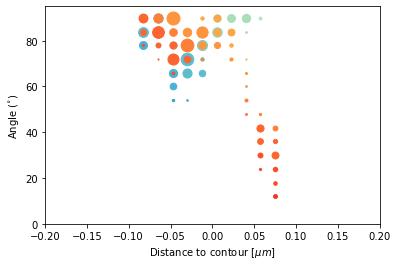

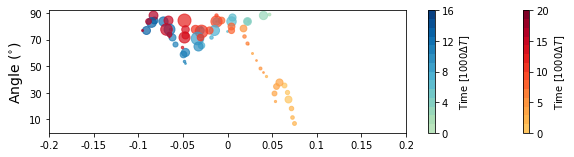

In [5]:
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots(figsize = (10,2.5))
#print(bins)
cmap2 = mpl.cm.YlOrRd(np.linspace(0,1,20))
cmap2 = mpl.colors.ListedColormap(cmap2[6:,:-1])
cmap1 = mpl.cm.GnBu(np.linspace(0,1,20))
cmap1 = mpl.colors.ListedColormap(cmap1[6:,:-1])
for i in range(len(distances)):
    for j in range(len(thetas)):
        ax2.scatter(distances[i]/1000,thetas[j],s=bins[i,j],color=cmap1((i+j)/(len(thetas)+len(distances))), marker = 'o');
        ax2.scatter(distances[i]/1000,thetas[j],s=binsv[i,j],color=cmap2((i+j)/(len(thetas)+len(distances))), marker = 'o');
for i in range(((NoBinsDist+1)*NoBinsThet)):
    ax3.scatter(dist[i]/1000, thet[i],s=bins2[i],color=cmap1((i)/((NoBinsDist+1)*NoBinsThet)), marker = 'o', alpha = 0.7);
    ax3.scatter(distv[i]/1000, thetv[i],s=bins2v[i],color=cmap2((i)/((NoBinsDist+1)*NoBinsThet)), marker = 'o', alpha = 0.7);

ax2.set_ylabel(r"Angle ($^{\circ}$)")
ax2.set_xlabel(r"Distance to contour [$\mu m$]")#"($ \mu m$)")
ax2.set_xlim(-0.200,0.200)
ax3.set_xticks([-0.200,-0.150,-0.100,-0.050,0,0.050,0.100,0.150,0.200])
ax3.set_xlim(-0.200,0.200)
ax3.set_ylabel(r"Angle ($^{\circ}$)", fontsize = 14)
#ax3.set_xlabel(r"Distance to contour [$\mu m$]", fontsize = 14)#"($ \mu m$)")
ax3.set_xticklabels(["-0.2","-0.15","-0.1","-0.05","0","0.05","0.1","0.15","0.2"])
ax3.set_yticks([10,30,50,70,90])
ax3.set_yticklabels(["10","30","50","70","90"])
ax2.set_ylim(0,95)
ax3.set_ylim(0,92)
fig3.subplots_adjust(bottom=0.2)
cbar2 = fig3.colorbar(mappable=None, cax=None, ax=None, cmap = cmap2, label = r'Time [$1000\Delta T$]',ticks=[0, 0.25,0.5,0.75, 1])
cbar1 = fig3.colorbar(mappable=None, cax=None, ax=None, cmap = cmap1, label = r'Time [$1000\Delta T$]',ticks=[0, 0.25,0.5,0.75, 1])
cbar1.ax.set_yticklabels(['0', '4', '8', '12','16'])  
cbar2.ax.set_yticklabels(['0', '5','10','15', '20'])  
fname = "SinkPathway"
fig3.savefig(plotsdir+fname+".pdf")